# LINEAR ALGEBRA ASSIGNMENT

                                                                                        Submitted By - Snigdha Jain

### Importing the necessary libraries

We first import the necessary libraries.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Defining the global variables

Next, we define some global variables. These are the variables which we'll use throughout Tasks 1, 2 and 3.

In [2]:
df = pd.read_csv('Nifty.csv')                            # Loading the Data
global train_df                                          # defining global variable train_df
global test_df                                           # defining global variable test_df
global y_train                                           # defining global variable y_train
global y_test                                            # defining global variable y_test
global X_train_std                                       # defining global variables for standard scaling
global X_test_std
global X_train_std_df
global X_test_std_df
global X_train_pca_99                                    # defining the training dataset after PCA at 99% variance
global X_train_pca_97                                    # defining the training dataset after PCA at 97% variance
global X_test_pca_97                                     # defining the testing dataset after PCA at 97% variance
global X_test_pca_99                                     # defining the testing dataset after PCA at 99% variance

### Data Preprocessing Step

In this step we define a function which drops the NaN value rows. We observe that our function has 5 rows which contain null values. The function below drops those rows.

In [3]:
def data_preprocessing():
    global df
    df.dropna(inplace=True)                       # dropping the NaN valued rows
    df.reset_index(drop=True,inplace=True)        # resetting the index of the rows.

### TASK 1

Now, We perform **Task 1**. We first find all the technical indicators mentioned using the following configurations :

1. SMA (n = 10) for Closing Price
2. EMA (n = 10, s = 2) for Closing Price
3. MACD for Closing Price
4. Range (n = 10)
5. Stochastic Oscillators (%K and %D)
6. Money Flow Index

We then plot all the technical indicators one by one. Next, we split our dataset into train dataset and test dataset and remove the unnecessary columns which we created while calculating our technical indicators. While calculating the technical indicators, we ended up having some rows which contained NaN value. We removed these NaN values by dropping the first 15 rows and the resetting the index to start from 0. We then divided the training and testing dataset into feature dataframe X and output vector y. The output vector y is the Closing price which needs to be predicted and the feature dataframe X contains the 10 features as follows :
1. High
2. Low
3. Volume
4. SMA
5. EMA
6. MACD
7. Range
8. %K
9. %D
10. MFI

We normalize the output vector y for train and test dataset by using *np.linalg.norm()* from *numpy* library of python. Therefore, after Task 1, we have input dataframes of train and test and output vectors of train and test.

In [4]:
def plot_SMA():
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["SMA"], color="b", label="SMA")
    plt.plot(df.Close, color="g", label="Close prices")
    plt.title("Simple Moving Average")
    plt.legend(loc="lower right")
    plt.show()

def plot_EMA():
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["SMA"], color="b", label="SMA") # plotting SMA
    plt.plot(df["EMA"], color="k", label="EMA")
    plt.plot(df.Close, color="g", label="Close prices") # plotting close prices
    plt.title("Exponential Moving Average")
    plt.legend(loc="lower right")
    plt.show()
    
def plot_MACD():
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["MACD"], color="b", label="MACD")
    plt.plot(df["MACDS"], color="g", label="Signal Line")
    plt.title("MACD for Closing Price")
    plt.legend(loc="lower right")
    plt.show()
    
def plot_Range():
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.subplot(2, 1, 1)
    plt.title("Range")
    plt.plot(df["Range"], color="b", label="Range")
    
    plt.subplot(2, 1, 2)
    plt.title("Closing Prices")
    plt.plot(df["Close"], color="g", label="Closing Prices")

    plt.show()

def plot_Stochastic_Oscillators():
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(20,10))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["%K"], color="b", label="%K")
    plt.plot(df["%D"], color="g", label="%D")
    plt.axhline(20, linestyle='--', color="r")
    plt.axhline(80, linestyle="--", color="r")
    plt.title("Stochastic Oscillators")
    plt.legend(loc="lower right")
    plt.show()
    
def plot_MFI():
    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12))                                          # Setting the size of the figure using pyplot.
    plt.plot(df["MFI"], color="b", label="MFI")
    plt.axhline(10, linestyle='--', color="r")
    plt.axhline(20, linestyle='--', color="g")
    plt.axhline(80, linestyle="--", color="g")
    plt.axhline(90, linestyle='--', color="r")
    plt.title("MFI")
    plt.ylabel("MFI values")
    plt.legend(loc="lower right")
    plt.show()

# Calculating Money Flow Index
def calculate_MFI():
    
    # Calculate the typical price
    typical_price = (df['Close'] + df['High'] + df['Low'])/3

    # Get the period
    period = 14

    # Calculate the money flow
    money_flow = typical_price * df['Volume']

    # Get all of the positive and negative money flows
    positive_flow = []
    negative_flow = []
    
    # Loop through the typical price
    for i in range(1, len(typical_price)):
        if (typical_price[i] > typical_price[i-1]):
            positive_flow.append(money_flow[i-1])
            negative_flow.append(0)

        elif typical_price[i] < typical_price[i-1]:
            negative_flow.append(money_flow[i-1])
            positive_flow.append(0)

        else:
            negative_flow.append(0)
            positive_flow.append(0)
    
    # Get all the positive and negative money flows within the time period
    positive_mf = []
    negative_mf = []

    for i in range(period-1, len(positive_flow)+period):
        positive_mf.append( np.sum(positive_flow[ i+1-period : i+1 ]) )

    for i in range(period-1, len(negative_flow)+period):
        negative_mf.append( np.sum(negative_flow[ i+1-period : i+1 ]) )
    
    # Calculate the money flow index
    MFI = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
    df['MFI'] = MFI


def task1():
    # Calculating the short-window simple moving average
    df['SMA'] = df['Close'].rolling(window=10).mean()
    
    # Calculating Exponential Moving Average
    df['EMA'] = df['Close'].ewm(span=10).mean()
    
    # Calculating MACD
    exp1 = df['Close'].ewm(span=12,adjust=False).mean()
    exp2 = df['Close'].ewm(span=26,adjust=False).mean()
    df['MACD'] = exp1 - exp2
    #A nine-day EMA of the MACD called the “signal line,” is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals.
    df['MACDS'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # Calculating range
    df['10-high'] = df['High'].rolling(10).max()
    df['10-low'] = df['Low'].rolling(10).min()
    df['Range'] = df['10-high'] - df['10-low']
    
    # Calculating stochastic oscillators
    df['14-high'] = df['High'].rolling(14).max()
    df['14-low'] = df['Low'].rolling(14).min()
    df['%K'] = (df['Close'] - df['14-low'])*100/(df['14-high'] - df['14-low'])
    df['%D'] = df['%K'].rolling(3).mean()
    
    # Calculating Money FLow Index
    calculate_MFI()
    
    # Split the dataset into training dataset and testing dataset. We define two global variables train_df and test_df.
    start_date = "2016-10-01"
    end_date = "2020-09-30"
    after_start_date = df["Date"] >= start_date
    before_end_date = df["Date"] <= end_date
    between_two_dates = after_start_date & before_end_date
    
    global train_df 
    train_df = df.loc[between_two_dates]
    global test_df 
    test_df = df.iloc[983:]
    
    # dropping the not required features
    train_df.drop(['Date','Open','Adj Close','MACDS','14-high','14-low','10-high','10-low'],axis=1,inplace=True)
    test_df.drop(['Date','Open','Adj Close','MACDS','14-high','14-low','10-high','10-low'],axis=1, inplace=True)
    
    # the first 15 values in the dataset are NaN so we drop them by starting our dataframe from the 16th row.
    train_df = train_df.iloc[15:]
    train_df.reset_index(drop=True,inplace=True)
    
    # defining the training and testing feature matrix and output vector
    global y_train
    y_train = train_df['Close']
    train_df = train_df.drop('Close',axis=1)
    test_df.dropna(inplace = True)
    test_df.reset_index(drop=True,inplace=True)
    
    global y_test
    y_test = test_df['Close']
    test_df = test_df.drop('Close',axis=1)
    
    # normalising y_train
    norm1= np.linalg.norm(y_train)
    y_train = y_train/norm1
    
    # normalising y_test
    norm2 = np.linalg.norm(y_test)
    y_test = y_test/norm1
    
    print("\n\n\n")
    print("\033[1m" + "TASK - 1 : Finding the Technical Indicators \n")
    print("\033[1m"+"Plot of the technical indicators"+"\033[1m" + "\n\n")
    
    # plotting the technical indicators
    print("Plot of Simple Moving Average \n\n")
    plot_SMA()
    print("\033[1m" + "Plot of Exponential Moving Average \n\n")
    plot_EMA()
    print("\033[1m"+"Plot of Moving Average Convergence Divergence \n\n")
    plot_MACD()
    print("\033[1m"+ "Plot of Range \n\n")
    plot_Range()
    print("\033[1m"+ "Plot of Stochastic Oscillators \n\n")
    plot_Stochastic_Oscillators()
    print("\033[1m"+ "Plot of Money Flow Index \n\n" + "\033[1m")
    plot_MFI()
    print("\n\n -------------------------------------------------------------------------------------------------------------------- \n\n\n")

### Task 2

In **Task 2**, we are required to perform principal component analysis. Principal Component Analysis (PCA) is an unsupervised linear transformation technique that is widely used across different fields, most prominently for feature extraction and dimensionality reduction. Other popular applications of PCA include exploratory data analyses and de-noising of signals in stock market trading, and the analysis of genome data and gene expression levels in the field of bioinformatics.

PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one.

We summarize The principal Component Analysis in the following steps: 

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
6. Construct a projection matrix W from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

In [5]:
from sklearn.preprocessing import StandardScaler

def task2():
    
    print("\033[1m" + "TASK - 2 : Performing Principal Component Analysis \n\n")
    
    # defining the global variables
    global X_train_std
    global X_test_std
    global X_train_std_df
    global X_test_std_df
    global train_df
    global test_df
    global X_train_pca_99
    global X_train_pca_97
    global X_test_pca_97
    global X_test_pca_99
    
    # First, we scale our dataset using Standard Scaler library from sklearn
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(train_df)
    X_test_std = scaler.transform(test_df)
    X_train_std_df = pd.DataFrame(X_train_std, columns = ['High','Low','Volume','SMA','EMA','MACD','%K','%D','Range','MFI'])
    X_test_std_df = pd.DataFrame(X_test_std, columns = ['High','Low','Volume','SMA','EMA','MACD','%K','%D','Range','MFI'])
    
    # Calculating the covariance matrix of the training dataframe
    cov_mat = np.cov(X_train_std_df.T)
    print("\033[1m" + "Covariance Matrix \n\n\n")
    # Calculating the eigen values and the eigen vectors from the covariance matrix
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    
    # plotting the covariance matrix as a heatmap
    f, ax = plt.subplots(figsize=(10,12))                # Figure size

    cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Color map

    _ = sns.heatmap(cov_mat, cmap="rocket", square=True, ax=ax, annot=True, linewidth=0.1)     # plot a heat map

    plt.title("Covariance Matrix", y=1.05, size=15)
    plt.show()
    
    #outputting the eigenvalues and the eigenvectors
    print("\n\n\n")
    print("\033[1m"+"Eigen Values :"+"\033[0m")
    print(eigen_vals)
    print("\n\n")
    print("\033[1m"+"Eigen Vectors :"+"\033[0m")
    print(eigen_vecs)
    
    # calculate cumulative sum of explained variances
    tot = np.sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    print("\n\n\n")
    print("\033[1m"+"Plotting the explained variance"+"\033[0m")

    sns.set()                                                            # Setting the style of plot using seaborn.
    plt.figure(figsize=(16,12)) 
    # plot explained variances
    plt.bar(range(1,11), var_exp, alpha=0.5,
            align='center', label='individual explained variance')
    plt.step(range(1,11), cum_var_exp, where='mid',
             label='cumulative explained variance')
    for i in range(1,len(cum_var_exp)):
        plt.text(i, cum_var_exp[i-1]+0.02 , '{:.3f}%'.format(cum_var_exp[i-1]))

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.show()
    
    # After plotting, we notice that cumulative variance of 4 features reach 92% and including 1 more feature makes the cumulative variance 97%. 
    #Hence 95% variance can't be obtained. Therefore, we will perform linear regression on pca components that explain 99% variance and 97% variance
    
    # Make a list of (eigenvalue, eigenvector) tuples
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    
    # calculating weights with 99% variance
    w_99 = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis], eigen_pairs[5][1][:, np.newaxis]))
     
    # calculating weights with 97% covariance
    w_97 =  np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis], eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis]))
    
    # defining the training and testing dataset after performing principle component analysis
    X_train_pca_99 = X_train_std.dot(w_99)                       # training dataset X obtained after PCA with 99% variance
    X_train_pca_97 = X_train_std.dot(w_97)                       # training dataset X obtained after PCA with 97% variance
    X_test_pca_99 = X_test_std.dot(w_99)                         # testing dataset X obtained after PCA with 99% variance
    X_test_pca_97 = X_test_std.dot(w_97)                         # testing dataset X obtained after PCA with 97% variance

### Task 3

We now have the final training and test datasets after performing PCA. In **Task 3** We now perform multilinear regression by training the model on datasets obtained after 99% and 97% variance and then predicting the closing prices for the testing dataset and checking the score. 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def task3():
    # declaring the global variables
    global X_train_pca_97
    global X_train_pca_99
    global y_train
    global X_test_pca_97
    global X_test_pca_99
    global y_test
    
    print("\n\n\n")
    print("\033[1m" + "TASK - 3 : Multilinear Regression \n\n"+"\033[0m")
    print("\033[1m"+"Multilinear Regression with features that explain 97% variance."+"\033[0m"+"\n")
    model_97_variance = LinearRegression()
    model_97_variance.fit(X_train_pca_97, y_train)
    y_pred_97_variance = model_97_variance.predict(X_test_pca_97)
    y_pred_97_variance = pd.Series(y_pred_97_variance)
    print("\033[1m"+"Regression Coefficients"+"\033[0m")
    print(model_97_variance.coef_)
    print("\n")
    print("\033[1m"+"Score of the Model"+"\033[0m")
    print(model_97_variance.score(X_test_pca_97,y_test))
    # calculating change in closing prices
    closing_price_diff_97_variance = []
    for i in range(1,len(y_pred_97_variance)) :
        closing_price_diff_97_variance.append(y_pred_97_variance[i]-y_pred_97_variance[i-1])
    print("\n")
    print("\033[1m"+"Closing Prices Difference"+"\033[0m")
    print(closing_price_diff_97_variance)
    
    print("\n\n")
    print("\033[1m"+"Multilinear Regression with features that explain 99% variance."+"\033[0m"+"\n")
    model_99_variance = LinearRegression()
    model_99_variance.fit(X_train_pca_99, y_train)
    y_pred_99_variance = model_99_variance.predict(X_test_pca_99)
    y_pred_99_variance = pd.Series(y_pred_99_variance)
    print("\033[1m"+"Regression Coefficients"+"\033[0m")
    print(model_99_variance.coef_)
    print("\n")
    print("\033[1m"+"Score of the Model"+"\033[0m")
    print(model_99_variance.score(X_test_pca_99,y_test))
    # calculating change in closing prices
    closing_price_diff_99_variance = []
    for i in range(1,len(y_pred_99_variance)) :
        closing_price_diff_99_variance.append(y_pred_99_variance[i]-y_pred_99_variance[i-1])
    print("\n")
    print("\033[1m"+"Closing Prices Difference"+"\033[0m")
    print(closing_price_diff_99_variance)
    

### Main function
The below function is the main function which provides all other functions.

In [7]:
def main():
    # data preprocessing step
    data_preprocessing()
    
    # task 1
    task1()
    
    # task 2
    task2()
    
    # task 3
    task3()

    





TASK - 1 : Finding the Technical Indicators 

Plot of the technical indicators


Plot of Simple Moving Average 




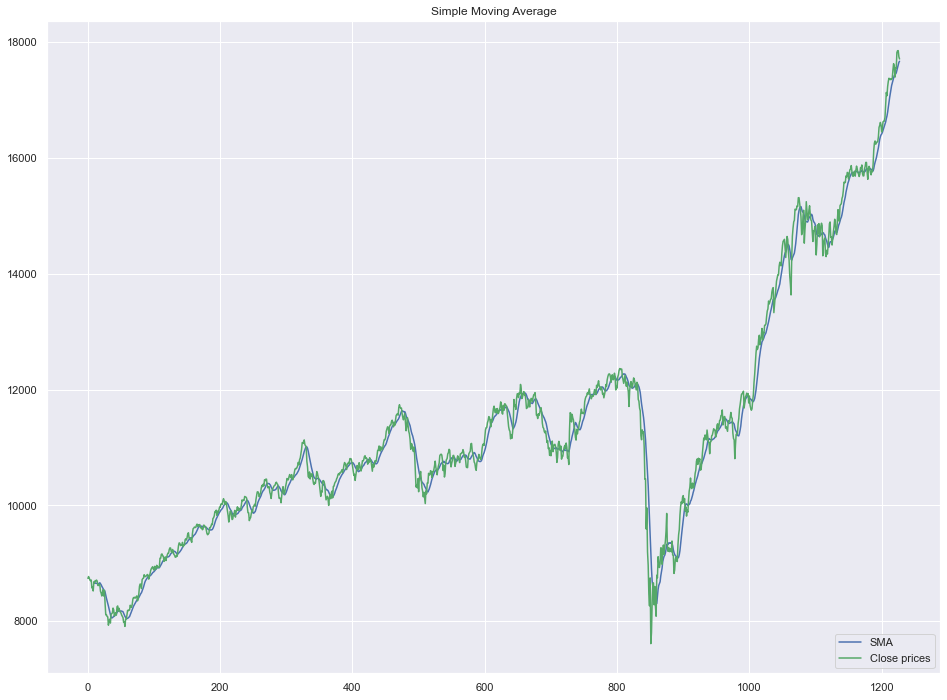

Plot of Exponential Moving Average 




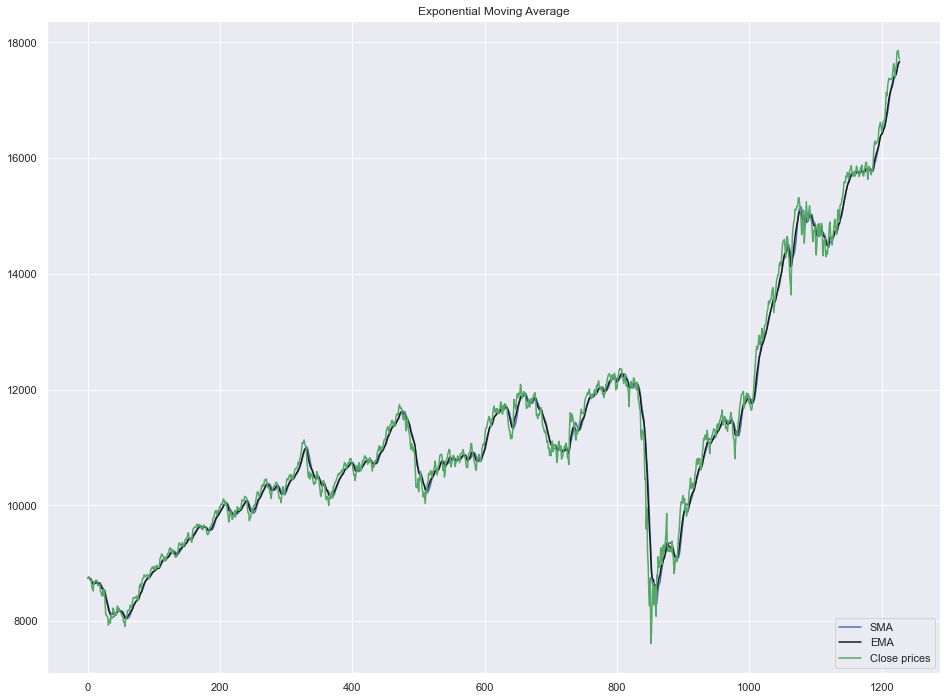

Plot of Moving Average Convergence Divergence 




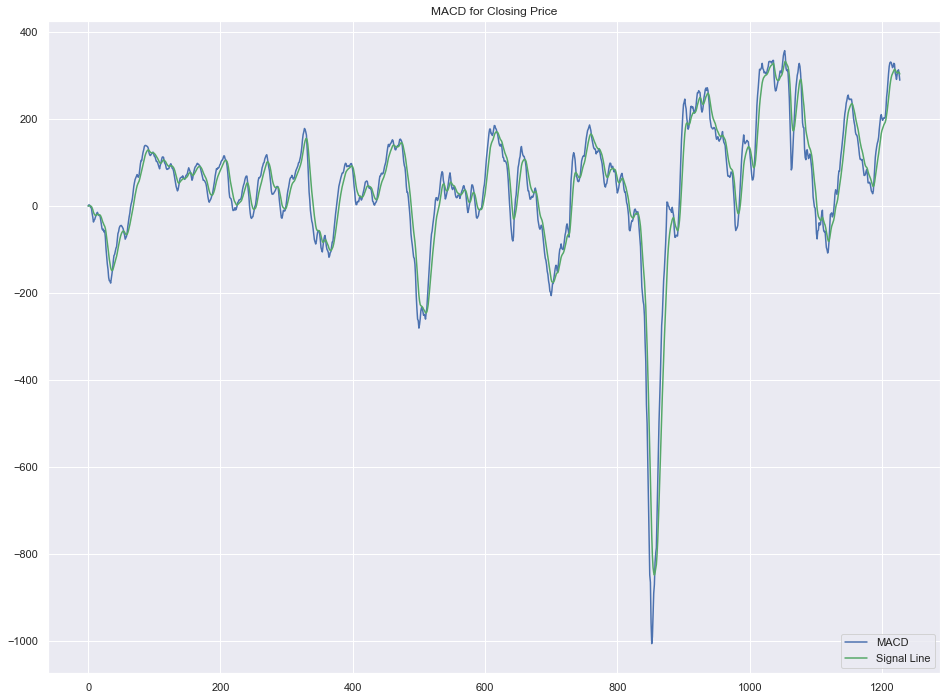

Plot of Range 




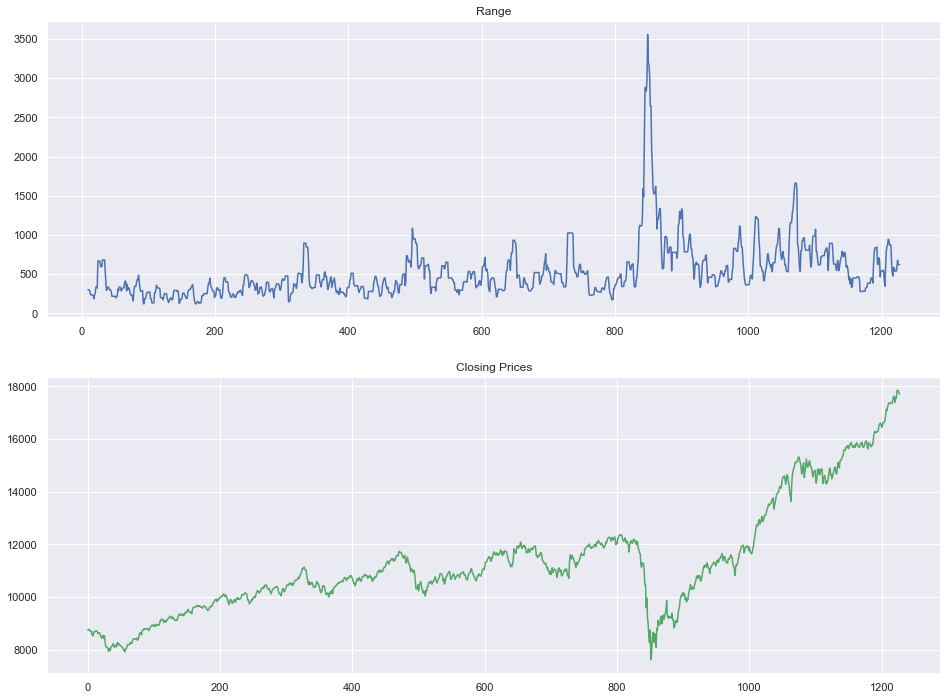

Plot of Stochastic Oscillators 




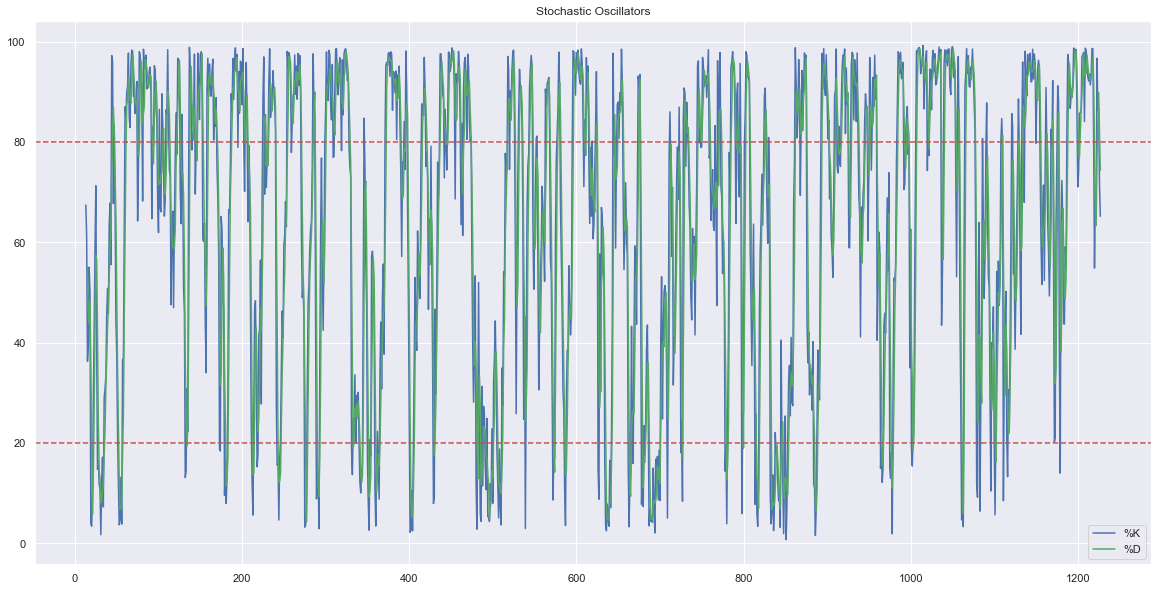

Plot of Money Flow Index 




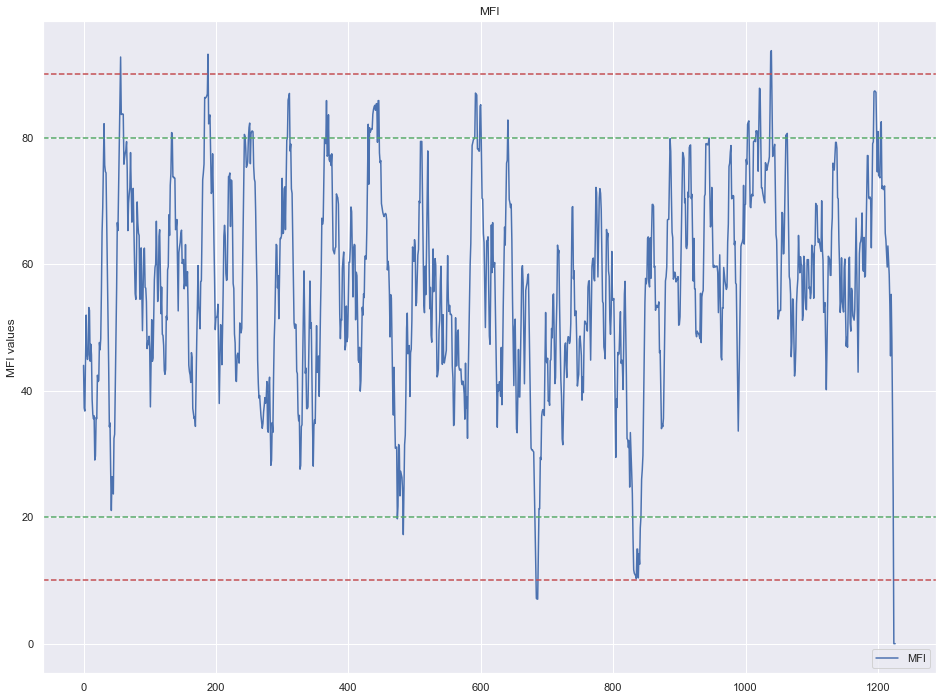



 -------------------------------------------------------------------------------------------------------------------- 



TASK - 2 : Performing Principal Component Analysis 


Covariance Matrix 





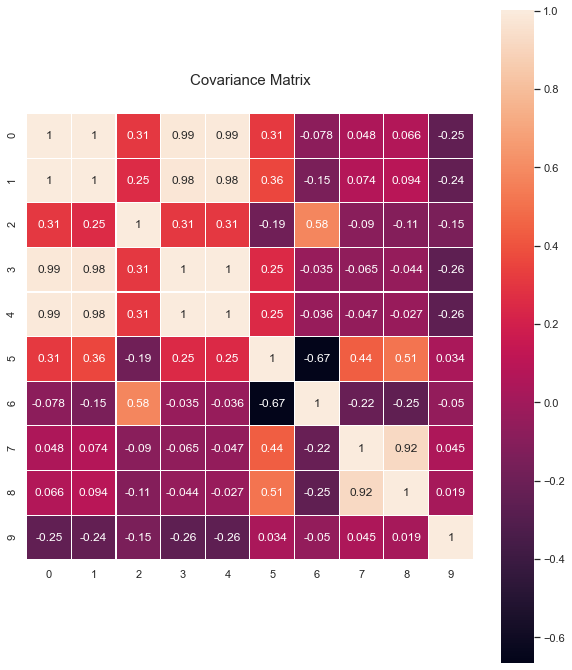





Eigen Values :
[4.27107265e+00 2.65863824e+00 1.38834150e+00 9.08076159e-01
 5.08050169e-01 1.85698080e-01 7.69974988e-02 1.17745599e-02
 1.44864315e-03 2.43762252e-04]



Eigen Vectors :
[[ 4.80225990e-01  2.83825463e-02 -1.25047449e-02  7.15449156e-02
  -1.09493648e-01 -2.33159397e-02  7.68598487e-03 -4.15517338e-01
  -7.48434870e-01  1.33796141e-01]
 [ 4.79859329e-01 -7.77674085e-03 -4.45516291e-02  6.27462046e-02
  -1.10962475e-01 -4.82839601e-02  1.14145468e-02 -5.63931871e-01
   6.54463538e-01  5.13481362e-02]
 [ 1.55908848e-01  3.07576803e-01  5.22158269e-01  1.36137072e-01
   6.61765823e-01 -3.86093873e-01 -4.51686080e-02  2.37815042e-02
   1.70455756e-02 -2.75377775e-03]
 [ 4.73977312e-01  8.90865236e-02 -6.14771289e-02  6.33103062e-02
  -1.15233742e-01  4.30472198e-02 -1.29064667e-02  6.05988890e-01
   1.01791327e-01  6.05589797e-01]
 [ 4.75235958e-01  8.32804924e-02 -5.05391450e-02  6.34735043e-02
  -1.33209507e-01  1.41481972e-02 -2.29057770e-02  3.60428846e-01
  -6.166

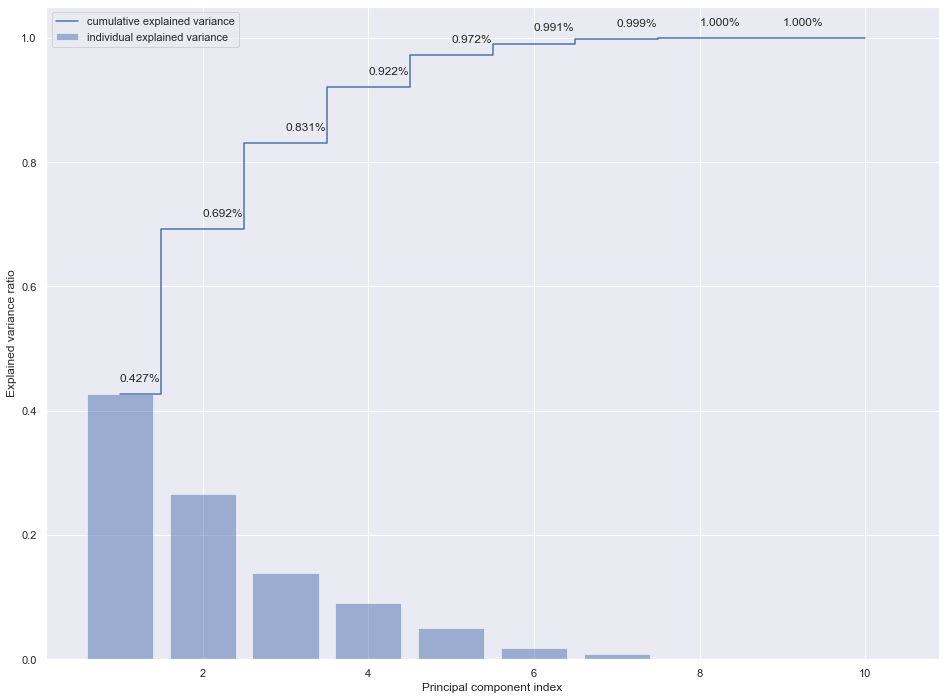





TASK - 3 : Multilinear Regression 


Multilinear Regression with features that explain 97% variance.

Regression Coefficients
[ 1.57838099e-03  2.18956896e-05 -7.49246636e-05  2.25377842e-04
 -3.78632870e-04]


Score of the Model
0.9967669068109104


Closing Prices Difference
[0.00030447831815458987, 0.00032718569584910123, 0.00023848394205525092, 0.0003309334872413361, 0.00019687574051840268, 0.00021658578143353424, 0.00010470397713392698, 6.922823883063339e-05, -0.00017483255270868414, -0.00015038348221228792, 0.00027217175914229924, 0.00011781592701251564, 6.481103010218259e-05, -3.528987064566058e-05, 9.890726540087713e-05, -0.00039803984328929537, 5.2764925613929536e-05, -0.0002500000663803875, -0.0002609165842364161, -0.00010570138131911488, -9.597556469113921e-06, 0.0003490985578283798, 0.00023751749040356457, 0.0005580490365737975, 0.00032117467644882797, 0.00048580757409189684, 0.00035534265277550187, 0.0003401353818351452, 0.0001629070690861087, 0.0001365671426761042, 0.0

In [8]:
main()

### Conclusion

In this linear algebra assignment, we understood about some technical indicators useful for predicting the stock prices. We calculated these features, plotted them and saw their variations with the stock prices. We performed principal component analysis for dimensionality reduction and extracting out the features which explain 99% and 97% variance. Lastly, using these features we performed Multilinear regression and predicted the stock prices for the test dataset and calculated the closing prices difference and accuracy.